In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import linregress

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices


In [600]:
df = pd.read_csv('data2.csv')
df.columns = df.columns.str.lower().str.replace(" ","_")


In [601]:
#agent roster summary

In [602]:
def share_of_pickup(x):
      return sum([n == 'pickup' for n in x]) / (len(x))
print('total users: {}'.format(len(ops.operator_id.unique())))
print('total calls: {}'.format(len(df)))


total users: 410
total calls: 200000


In [603]:
ops = df.groupby(['operator_id','position_name','location_code']).agg({'operator_id':'count','call_time_in_seconds':'mean','order_type':share_of_pickup})
ops

,,,operator_id,call_time_in_seconds,order_type
operator_id,position_name,location_code,,,
0020668a-f24f-4b92-859b-c6cf06d778b5,Team Lead,DGT,10,75.806,0.600
0034c8cd-31d3-46d7-8cc2-4907b7dd7f30,Tier I CSR,DGT,108,96.802,0.843
006a3800-98c1-4b90-b1a7-e8c5908e1617,Tier I CSR,DGT,431,83.927,0.812
00ad0c87-eac3-4392-999a-0adb9d1dca48,Tier I CSR,MNL,78,96.983,0.821
0107cb5e-fbb4-4dcc-bb36-68249367d9e2,Tier II CSR,MNL,333,101.916,0.769
...,...,...,...,...,...
feffc9c3-ed97-4dda-92c6-435e011cfc4a,Client Success Asst,MNL,95,144.425,0.589
ff218965-dede-4fdf-aef5-ab586f94c79f,Tier II CSR,MNL,336,101.300,0.780
ff397d84-ffa1-4708-a3ad-156b93662778,Client Success,WKL,2,315.057,1.000


In [604]:
ops.groupby(['position_name'])[['call_time_in_seconds']].mean().sort_values(by='call_time_in_seconds')


,call_time_in_seconds
position_name,
Workforce,34.748
Spanish CSR,93.351
Tier I CSR,98.715
Tier II CSR,102.488
Tier III CSR,110.149
Mentor,115.870
Managerial,117.524
Subject Matter Exp,132.357
Trainee,137.273


Text(0.5, 1.0, 'Distribution of Call Times')

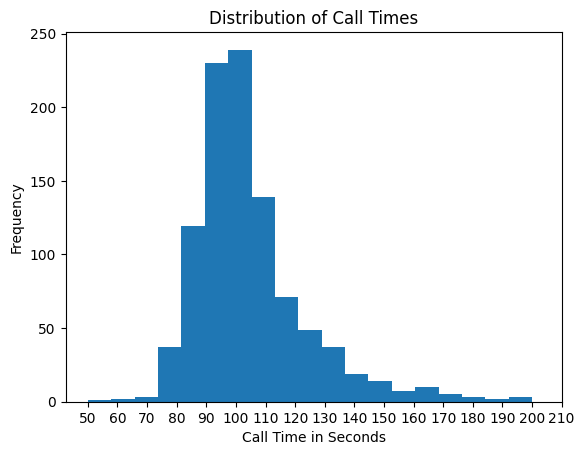

In [605]:
min_bin = 50
max_bin = 200
bins = np.linspace(min_bin, max_bin, 20)
tick_marks = np.arange(min_bin, max_bin + 15, 10)



plt.hist(ops.call_time_in_seconds,bins=bins)
plt.xticks(tick_marks)
plt.xlabel('Call Time in Seconds')
plt.ylabel('Frequency')
plt.title('Distribution of Call Times')

In [606]:
#clean data set
df.order_payment_type = df.order_payment_type.apply(lambda x: 'CARD' if x != 'CASH' else x)
df = df.loc[df.order_type != 'walkin']
#df = df.loc[df.order_type != 'delivery_enabled']

In [607]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [608]:
df.groupby('order_type').size() / df.groupby('order_type').size().sum()

order_type
deliver            0.215
delivery_enabled   0.007
pickup             0.778
dtype: float64

In [609]:
df

,customer_id,restaurant_id,operator_id,location_code,full_name,position_name,created_at_est,order_payment_type,order_type,call_time_in_seconds,conversation_total_sales_in_usd
0,eac9742b-5bde-4696-8fa9-24ea7d83253f,8932364a-fc86-47e2-ac13-864b8045d943,c1a1a218-a954-4cc6-a356-18f005815955,DGT,Mae Arong,Tier II CSR,2022-09-18 15:17:43,CARD,pickup,239.535,10.780
1,efca1307-6af9-4c45-a920-41ac47a6ccde,2b51de98-2057-40e8-b7c8-373aa80a6fdf,d8836b01-a502-429f-a49a-cf8a406c256b,DGT,Marielle Asanuddin,Tier II CSR,2022-09-11 16:52:47,CASH,pickup,71.574,0.000
2,b3f1c038-faa6-439f-b285-f07e7944709d,37883b9d-0a6a-46fb-bf7c-293e7de0a7b1,efdc5a32-0d66-4898-8b69-3d18fe20f505,MNL,Jemie Cacal,Tier II CSR,2022-10-04 13:33:02,CARD,delivery_enabled,204.593,46.780
3,4b7ccd8c-2c69-40f9-bf10-6268e1f0bb4d,7112a0ac-4523-4beb-b33d-beed4822c71d,c1a1a218-a954-4cc6-a356-18f005815955,DGT,Mae Arong,Tier II CSR,2022-09-18 15:17:43,CASH,deliver,108.545,23.240
4,e0b33a04-4617-43ac-a590-3bd3aa328174,48e2dea7-d98c-11ea-b309-0a1bee1ec0be,ae1c620b-4afc-4af1-9217-b71c5f11eba5,MNL,Zai Dajoya,Tier III CSR,2019-08-24 19:39:43,CASH,pickup,123.298,51.880
...,...,...,...,...,...,...,...,...,...,...,...
199995,9c91b817-e65d-4d49-a4aa-b27140ba6b18,68aab966-aac6-4ac5-b99b-e99b7d4661d0,85889df2-9837-45bd-816c-c73058136c86,DGT,Virgen Piedad,Tier I CSR,2023-10-22 17:46:17,CASH,pickup,52.535,30.720
199996,c2afd903-04dc-4f60-a7b7-6bd200bb357d,ef6c1235-f2b1-45f5-a28b-bc9f194ec705,88ce325c-05e7-43da-8fce-28ceed8ae484,DGT,Cris Dagangan,Tier II CSR,2022-12-16 21:58:47,CASH,pickup,34.540,12.750
199997,44328009-3017-475a-9528-7dcd3f5f0fee,9a03aabb-b5fe-49ec-a2ca-e5427fde1d6c,08c11621-5d21-4a53-b42e-6bad522ab0c5,MNL,Ann Navida,Tier II CSR,2022-12-12 02:13:09,CASH,pickup,60.008,18.450
199998,36fa5fe2-454f-4a11-83a5-d380b7e8859a,516bfb7f-8300-11e9-8017-0a1bee1ec0be,a7bd73fd-1fc5-4bb1-b283-93a884ebc8ed,DGT,Daisy Leyble,Tier I CSR,2023-10-01 21:06:00,CASH,pickup,199.535,31.020


In [610]:
df.groupby('order_payment_type').size() / df.groupby('order_payment_type').size().sum()

order_payment_type
CARD   0.085
CASH   0.915
dtype: float64

In [611]:
#Create Model OLS 

formula = 'call_time_in_seconds ~ C(order_payment_type) + C(order_type) + conversation_total_sales_in_usd '

# Creating and fitting the model
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     call_time_in_seconds   R-squared:                       0.283
Model:                              OLS   Adj. R-squared:                  0.283
Method:                   Least Squares   F-statistic:                 1.973e+04
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                          23:32:45   Log-Likelihood:            -1.1181e+06
No. Observations:                199828   AIC:                         2.236e+06
Df Residuals:                    199823   BIC:                         2.236e+06
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           148.1539      0.589    251.359      0.000     146.999     149.309
C(order_payment_type)[T.CASH]       -58.2750      0.623    -93.562      0.000     -59.496     -57.054
C(order_type)[T.delivery_enabled]    47.6956      1.776     26.858      0.000      44.215      51.176
C(order_type)[T.pickup]             -38.4729      0.408    -94.387      0.000     -39.272     -37.674
conversation_total_sales_in_usd       1.3435      0.008    167.377      0.000       1.328       1.359
==============================================================================
Omnibus:                   163883.493   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9365536.745
Skew:                           3.573   Prob(JB):                         0.00
Kurtosis:                      35.769   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""